# 『カラマーゾフの兄弟』で学ぶ自然言語処理（可視化編）

## テキストのダウンロードと確認

In [1]:
# 前回前処理したテキストをダウンロード
!wget https://github.com/koshka-tsu/kara_nlp/raw/master/data/cleansed_kara.txt

--2021-03-28 10:03:28--  https://github.com/koshka-tsu/kara_nlp/raw/master/data/cleansed_kara.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/koshka-tsu/kara_nlp/master/data/cleansed_kara.txt [following]
--2021-03-28 10:03:28--  https://raw.githubusercontent.com/koshka-tsu/kara_nlp/master/data/cleansed_kara.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225486 (1.2M) [text/plain]
Saving to: ‘cleansed_kara.txt.3’

cleansed_kara.txt.3 100%[===================>]   1.17M  --.-KB/s    in 0.08s   

2021-03-28 10:03:28 (14.4 MB/s) - ‘cleansed_kara.txt.3’ saved [1225486/1225486]



In [2]:
# テキストの読み込み
with open('cleansed_kara.txt', 'r', encoding='utf-8') as f:
    text = f.read()
print(text)

カラマゾフの兄弟
上
ドストエーフスキイ
中山省三郎訳
誠にまことに汝らに告ぐ、一粒の麦、地に落ちて死なずば、
唯一つにて在りなん、もし死なば、多くの果を結ぶべし。
ヨハネ伝第十二章第二十四節
アンナ・グリゴリエヴナ・ドストイエフスカヤにおくる
作者より
 この物語の主人公アレクセイ・フョードロヴィッチ・カラマゾフの伝記にとりかかるに当たって、自分は一種の懐疑に陥っている。すなわち、自分は、このアレクセイ・フョードロヴィッチを主人公と呼んではいるが、しかし彼がけっして偉大な人物でないことは、自分でもよく承知している。したがって、『アレクセイ・フョードロヴィッチをこの物語の主人公に選ばれたのは、何か彼に卓越したところがあってのことなのか？ いったいこの男が、どんなことを成し遂げたというのか？ 何によって、誰に知られているのか？ いかなる理由によって、われわれ読者は、この人間の生涯の事実の研究に時間を費やさなければならないのか？』といったたぐいの質問を受けるにきまっていることは、今のうちからよくわかっている。
 この最後の質問は最も致命的なものである。それに対しては、ただ、『御自分でこの小説をお読みになられたら、おそらく納得なさるであろう』としか答えられないからである。ところが、この小説を一通り読んでも、なおかつ納得がゆかず、わがアレクセイ・フョードロヴィッチの注目すべき点を認めることができないといわれた暁には、どうしたものか？ こんなことを言うのも、実はまことに残念ながら、今からそれが見え透いているからである。作者にとっては、確かに注目すべき人物なのであるが、はたしてこれを読者に立証することができるだろうか、それがはなはだおぼつかない。問題は、彼もおそらく活動家なのであろうが、それもきわめて曖昧で、つかみどころのない活動家だというところにある。もっとも、今のような時世に、人間に明瞭さを要求するとしたら、それこそ要求するほうがおかしいのかもしれぬ。ただ一つ、どうやら確実らしいのは、この男が一風変わった、むしろ奇人に近い人物だということである。しかし、偏屈とか奇癖とかいうものは、個々の特殊性を統一して、全般的な乱雑さのうちに、ある普遍的な意義を発見する能力を、与えるというよりは、むしろ傷つける場合が多い。奇人というものは、たいていの場合に、特殊で格別なものである。そうでは

## ワードクラウド

In [3]:
!pip install janome

In [4]:
# ストップワード辞書のダウンロード
!wget 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'

--2021-03-28 10:03:32--  http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt
Resolving svn.sourceforge.jp (svn.sourceforge.jp)... 44.240.209.230
Connecting to svn.sourceforge.jp (svn.sourceforge.jp)|44.240.209.230|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2202 (2.2K) [text/plain]
Saving to: ‘Japanese.txt.3’

Japanese.txt.3      100%[===================>]   2.15K  --.-KB/s    in 0s      

2021-03-28 10:03:32 (488 MB/s) - ‘Japanese.txt.3’ saved [2202/2202]



In [5]:
# ストップワード辞書を格納
with open('./Japanese.txt', 'r', encoding='utf-8') as f:
    stopword_ls = f.read().splitlines()
stopword_set = set(stopword_ls)  # 後で頻繁に検索するので集合にしておく

In [22]:
from janome.tokenizer import Tokenizer

noun_ls = []  # 名詞の形態素を格納
tokenizer = Tokenizer(wakati=False)
for t in tokenizer.tokenize(text):
    word_class = t.part_of_speech.split(',')[0]  # 品詞
    if word_class == '名詞':
        noun_ls.append(t.surface)

# ストップワードの除去
noun_ls = [n for n in noun_ls if n not in stopword_set]
noun_concat_str = ' '.join(noun_ls)
print(noun_concat_str)

('カラマゾフ 兄弟 ドストエーフスキイ 中山 省三郎 訳 汝 ら 粒 麦 果 ヨハネ 伝 章 節 アンナ・グリゴリエヴナ・ドストイエフスカヤ 作者 物語 '
 '主人公 アレクセイ・フョードロヴィッチ・カラマゾフ 伝記 一種 懐疑 アレクセイ・フョードロヴィッチ 主人公 偉大 人物 承知 '
 'アレクセイ・フョードロヴィッチ 物語 主人公 の 卓越 の の の 理由 われわれ 読者 人間 生涯 事実 研究 の たぐい 質問 最後 質問 致命 '
 '小説 読み 納得 小説 通り 納得 アレクセイ・フョードロヴィッチ 注目 暁 の 残念 作者 注目 人物 の 読者 立証 問題 活動 の 曖昧 どころ '
 '活動 時世 人間 明瞭 さ 要求 要求 の 確実 の 一風 奇人 人物 偏屈 奇癖 個々 特殊 統一 全般 乱雑 さ 普遍 意義 発見 能力 奇人 特殊 '
 '格別 読者 最後 主張 賛成 主人公 アレクセイ・フョードロヴィッチ 価値 意 次第 の 奇人 特殊 格別 完全 無欠 心髄 その他 時代 風 '
 '吹きまわし 一時 奇人 の 味気 雲 説明 身 前口上 いっさい 抜き 本文 お気 通読 伝記 小説 二つ 重要 小説 主人公 現代 活動 現在 活動 '
 'の 小説 小説 主人公 青年 時代 初期 刹那 初め 小説 抜き 小説 最初 困惑 紛糾 伝記 自身 控え目 どころ 主人公 小説 よけい 二つ 不遜 '
 'やり口 説明 問題 解決 あげく 解決 決心 炯眼 読者 最初 むやみ 役 文句 貴重 浪費 の 腹 お答え 役 文句 貴重 浪費 の 儀礼 先手 考え '
 'の 小説 本質 完全 一体 二つ 物語 の 読者 最初 物語 通読 物語 価値 決定 ひとり 拘束 最初 物語 ページ つもり 本 の 公平 判断 最後 '
 'デリケート 読者 の ロシア 批評 諸君 彼ら 精密 良心 小説 插話 辺 本 の 正当 口実 提供 序文 種切れ よけい 同感 本文 篇 歴史 '
 'フョードル・パーヴロヴィッチ・カラマゾフ アレクセイ・フョードロヴィッチ・カラマゾフ 郡 地主 フョードル・パーヴロヴィッチ・カラマゾフ 三男 父 '
 'フョードル 悲劇 陰惨 最後 ころ 噂 非常 評判 人物 事件 お話し 地主 当地 実 生涯 一風 型 人間 やく

In [7]:
!pip install wordcloud

In [8]:
!apt install fonts-takao-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-takao-gothic is already the newest version (00303.01-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [9]:
import matplotlib.font_manager as fm
font_ls = fm.findSystemFonts(fontext='ttf')
jp_font_path = [f for f in font_ls if 'takao' in f][0]
print(jp_font_path)

/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf


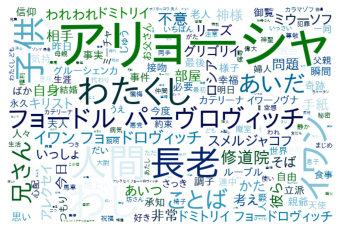

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(width=600, height=400, background_color='white', 
               colormap='ocean', font_path=jp_font_path)

plt.imshow(wc.generate(noun_concat_str))
plt.axis('off')
plt.show()

## Word2Vec

In [11]:
!pip install gensim

In [23]:
import re

def split_to_sents(text):
    """
    文単位に分割（シンプルなルールベース）
    """
    sents_ls = re.split(r'\n|。', text)  # 本当は，"！"や"？"でも区切りたいところ
    sents_ls = [s.strip() for s in sents_ls if len(s) != 0]
    return sents_ls

sents_ls = split_to_sents(text)
from pprint import pprint
pprint(sents_ls)

Streaming output truncated to the last 5000 lines.
 'おれがこの令嬢のそばへ近寄ったのは、それからかなり後のある夜会の席だったが、話しかけてみたんだけれど、ろくにこちらを見向きもしないで、軽蔑したように口をきっと結んでいるじゃないか',
 'ようし、と、おれは肚の中で思ったんだ、今に仇を討ってやるから！ おれはそのころ、たいていの場合、おそろしく無作法者だった',
 'それは自分でも気がついていた',
 'だがそれより、もっと感じたことは、この『カーチェンカ』が無邪気な女学生というよりは、気性のしっかりした、自尊心の強い、真から徳の高い、それに第一、知恵と教育のある淑女だのに、おれにはそいつが両方ともないってことなんだ',
 'おまえはおれが結婚の申しこみでもしようとしたと思うかい？ '
 'どうしてどうして、ただ仇が討ちたかったばかりだ、おれはこんな好漢なのに、あの女はそれに気づきおらん、といった肚なのさ',
 'が、当分は遊興と乱暴で日を送った',
 'とうとうしまいに中佐はおれを三日間の拘禁に処したくらいだ',
 'ちょうどその時分、親爺がおれに六千ルーブル送ってよこした',
 'それはおれが正式の絶縁状をたたきつけて、この後二度と再び無心をしない、『総勘定』を済ましたことにするからと言ってやった結果なんだ',
 '当時おれにはなんにもわからなかったんだ',
 'こちらへ来るまで、いや、つい、この四五日前まで、というより恐らく今日まで、親爺との金銭関係がどうなっているか、さっぱりわからなかったんだ',
 'だがそんなことはどうだってかまやしない、あとまわしだ',
 'ところがその六千ルーブルを受け取ったころ、おれは突然、ある友だちがよこした手紙から、自分にとってとても興味のある事実を知ったのだ',
 'それはほかでもない、おれたちの中佐が秩序紊乱の嫌疑で当局の不興を買っているということなんだ',
 'つまり、反対派の陥穽にひっかかったんだよ',
 'で、直接師団長がやって来て、小っぴどく油を絞ったのだ',
 'それからしばらくして、退職願いを出せという命令があったのだ',
 'まあ、その詳しいいきさつをおまえに話すのはやめにするが、実際この人には敵があったのだ',
 'そして急にこの中佐とその家族に対する町の

In [13]:
# 形態素解析
def wakati(tokenizer, text):
    token_ls = list(tokenizer.tokenize(text))
    return token_ls

token_ls = []
tokenizer = Tokenizer(wakati=True)  # Tokenizerのインスタンス化はforループの外で行う
for sents in sents_ls:
    token_ls.append(wakati(tokenizer, sents))

In [14]:
from gensim.models import word2vec
model = word2vec.Word2Vec(token_ls, size=100, min_count=1, window=5, iter=200)

In [15]:
# 類似語の取得
model.wv.most_similar('アリョーシャ', topn=10)

[('彼', 0.4988832473754883),
 ('リーズ', 0.4983484148979187),
 ('ミウーソフ', 0.4935529828071594),
 ('イワン', 0.4455975592136383),
 ('彼女', 0.4432331621646881),
 ('ラキーチン', 0.42547866702079773),
 ('僧', 0.42096030712127686),
 ('イワン・フョードロヴィッチ', 0.4118502736091614),
 ('フョードル・パーヴロヴィッチ', 0.40699303150177),
 ('スメルジャコフ', 0.40468165278434753)]

## UMAPでの可視化

In [16]:
!pip install umap-learn

In [17]:
# 名詞の登場回数を数える
from collections import Counter

count = Counter(noun_ls)
most_common_noun, n_appearances = zip(*count.most_common(100))

In [18]:
# 名詞の中で登場回数の多いものを抽出
data = []  # 特徴ベクトル
labels = []  # 単語の文字列
for s in most_common_noun[2:]: 
    data.append(model.wv[s])
    labels.append(s)
n_appearances = n_appearances[2:]

In [19]:
# UMAPによる次元削減
import umap
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=jp_font_path, size=16)

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(data)

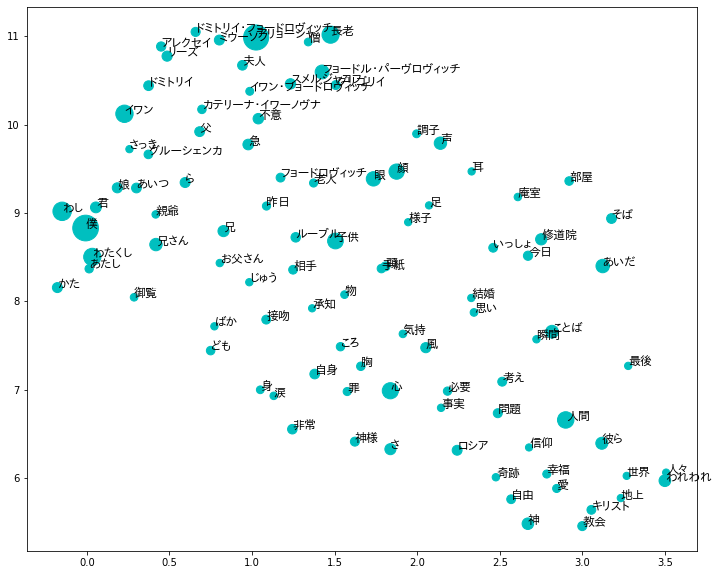

In [20]:
# 散布図の表示
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c='c', s=n_appearances)
for i in range(len(embedding)):
    plt.annotate(labels[i], (embedding[i, 0], embedding[i, 1]), 
                 fontsize=12, fontproperties=fp)
plt.show()